# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html

In [1]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt

# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [2]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        
        
    def _move(self, act, acts_1 = ["UP", "DOWN"], acts_2 = ["LEFT", "RIGHT"], tol_1 = 0.8, tol_2 = 0.9):
        """
        Args:
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
            acts_1: a list of acts of moving vertically
            acts_2: a list of acts of moving horizontally
            tol_1: a threshold to move in the correct direction 
            tol_2: a threshold to move in one of the perpendicular directions
        Output args: 
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        """
        # Initialize the noise level
        noise_level = random.random()
        # With probability 0.8, the agent moves in the correct direction.
        if noise_level < tol_1:
            return act
        # With probability 0.1 each, it moves in one of the two “perpendicular” directions.
        if noise_level < tol_2:
            if act in acts_1:
                return acts_2[0]
            return acts_1[0]
        else:
            if act in acts_1:
                return acts_2[1]
            return acts_1[1]
        
        
    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        real_act = self._move(act)
        next_state = self.take_action(state, real_act)
        
        # CODE HERE: compute the reward based on the resulting state
        reward = 1 if next_state == self.goal_state else 0
        
        # return the current state, reward
        return next_state, reward, real_act
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [3]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [4]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 100

    # create a loop
    for t in range(time_step):
        
        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        action = input("Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT), else to exit: ").upper()
        if action not in ["UP", "DOWN", "LEFT", "RIGHT"]:
            break
        
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state, action)[:2]
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT), else to exit: up
Step = 0, state = [0, 0], action = UP, next state = [1, 0], reward = 0
Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT), else to exit: up
Step = 1, state = [1, 0], action = UP, next state = [1, 1], reward = 0
Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT), else to exit: up
Step = 2, state = [1, 1], action = UP, next state = [1, 2], reward = 0
Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT), else to exit: up
Step = 3, state = [1, 2], action = UP, next state = [2, 2], reward = 0
Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT), else to exit: right
Step = 4, state = [2, 2], action = RIGHT, next state = [2, 1], reward = 0
Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT), else to exit: right
Step = 5, state = [2, 1], action = RIGHT, next state = [3, 1], reward = 0
Please choose agent's moving direction (UP, DOWN, LEFT or RIGHT)

# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

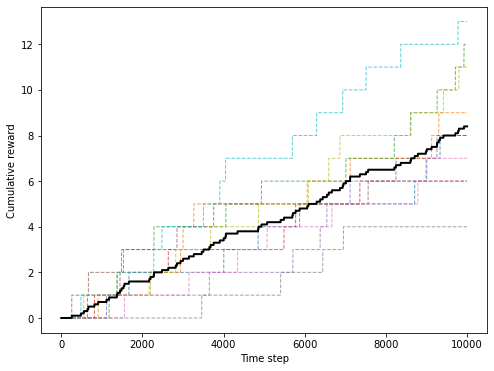

In [5]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list_0 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action_index = np.random.choice(4, 1, p=[0.25, 0.25, 0.25, 0.25])[0]
            action = ["UP", "DOWN", "LEFT", "RIGHT"][action_index]
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state, action)[:2]
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list_0.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list_0)

# 4 Implement better & worse policies against the Random Policy

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

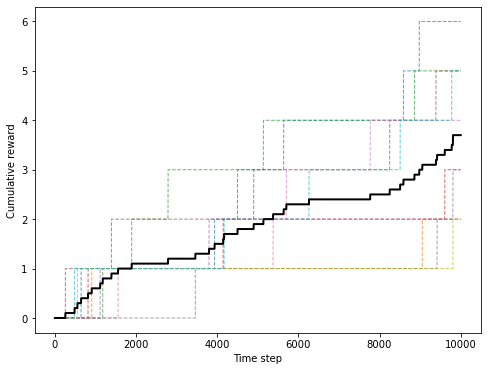

In [6]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list_1 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
        # save "forbidden actions" near wall cells for future reference
        found_goal = False
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            # Search towards where the goal located after found the goal
            if found_goal:
                optimal_directions = []
                relative_state = np.array(goal_state) - np.array(state)
                if relative_state[0] > 0:
                    optimal_directions.append("RIGHT")
                elif relative_state[0] < 0:
                    optimal_directions.append("Left")
                if relative_state[1] > 0:
                    optimal_directions.append("UP")
                elif relative_state[1] < 0:
                    optimal_directions.append("DOWN")
                p_list = [0.275] * 4
                if len(optimal_directions) == 1:
                    i = ["UP", "DOWN", "LEFT", "RIGHT"].index(optimal_directions[0])
                    p_list[i] = 0.175
                else:
                    relative_s = np.abs(relative_state)
                    for i in range(len(optimal_directions)):
                        d = optimal_directions[i]
                        i_1 = ["UP", "DOWN", "LEFT", "RIGHT"].index(d)
                        p_list[i_1] = 0.45 * relative_s[i] / sum(relative_s)
            else:
                # Random search until found where the goal located
                p_list = [0.25, 0.25, 0.25, 0.25]
                    
            action_index = np.random.choice(4, 1, p=p_list)[0]
            action = ["UP", "DOWN", "LEFT", "RIGHT"][action_index]
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward, real_act = env.step(state, action)
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                if not found_goal:
                    found_goal = True
                    goal_state = next_state
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list_1.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list_1)

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

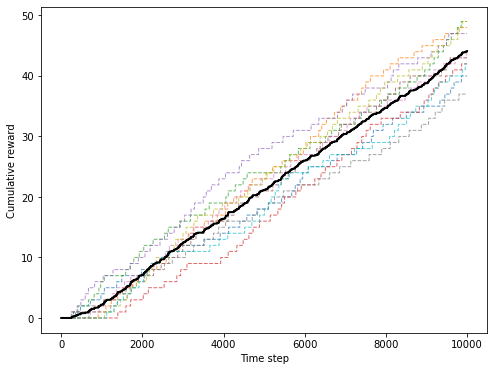

In [7]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list_2 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
        # save "forbidden actions" near wall cells for future reference
        forbidden_acts = dict()
        found_goal = False
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            # CODE HERE: please implement a policy that is better than the random policy.
            # It should takes in the current state and output an action
            if tuple(state) in forbidden_acts:
                remain_acts = 4 - len(forbidden_acts[tuple(state)])
                p_list = [1  / remain_acts] * 4
                for s in forbidden_acts[tuple(state)]:
                    i = ["UP", "DOWN", "LEFT", "RIGHT"].index(s)
                    p_list[i] = 0
            else:
                # Search towards where the goal located after found the goal
                if found_goal:
                    optimal_directions = []
                    relative_state = np.array(goal_state) - np.array(state)
                    if relative_state[0] > 0:
                        optimal_directions.append("RIGHT")
                    elif relative_state[0] < 0:
                        optimal_directions.append("Left")
                    if relative_state[1] > 0:
                        optimal_directions.append("UP")
                    elif relative_state[1] < 0:
                        optimal_directions.append("DOWN")
                    p_list = [0.15] * 4
                    if len(optimal_directions) == 1:
                        i = ["UP", "DOWN", "LEFT", "RIGHT"].index(optimal_directions[0])
                        p_list[i] = 0.55
                    else:
                        relative_s = np.abs(relative_state)
                        for i in range(len(optimal_directions)):
                            d = optimal_directions[i]
                            i_1 = ["UP", "DOWN", "LEFT", "RIGHT"].index(d)
                            p_list[i_1] = 0.7 * relative_s[i] / sum(relative_s)
                else:
                    # Random search until found where the goal located
                    p_list = [0.25, 0.25, 0.25, 0.25]
                    
            action_index = np.random.choice(4, 1, p=p_list)[0]
            action = ["UP", "DOWN", "LEFT", "RIGHT"][action_index]
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward, real_act = env.step(state, action)
            # Record the state and action if the agent hit the wall
            if next_state == state:
                if tuple(state) in forbidden_acts:
                    if real_act not in forbidden_acts[tuple(state)]:
                        forbidden_acts[tuple(state)].append(real_act)
                else:
                    forbidden_acts[tuple(state)] = [real_act]
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                if not found_goal:
                    found_goal = True
                    goal_state = next_state
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list_2.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list_2)

In [8]:
# PLOT FUNCTION
def plot_func(res_list_0, res_list_1, res_list_2):
    # set the figure size
    plt.figure(figsize=(8, 10))
    
    for re in res_list_0:
        plt.plot(list(range(len(res_list_0[0]))), re, linestyle="--", linewidth=1, alpha=0.7)
    mean_reward_0 = np.array(res_list_0).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list_0[0]))), mean_reward_0, linestyle="-", linewidth=2, color="k", label='Rondom policy')
    
    for re in res_list_1:
        plt.plot(list(range(len(res_list_1[0]))), re, linestyle="--", linewidth=1, alpha=0.7)
    mean_reward_1 = np.array(res_list_1).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list_1[0]))), mean_reward_1, linestyle="-", linewidth=2, color="g", label='Worse policy')
    
    for re in res_list_2:
        plt.plot(list(range(len(res_list_2[0]))), re, linestyle="--", linewidth=1, alpha=0.7)
    mean_reward_2 = np.array(res_list_2).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list_2[0]))), mean_reward_2, linestyle="-", linewidth=2, color="b", label='Better policy')
    
    # plot the figure
    plt.legend(loc="upper right")
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

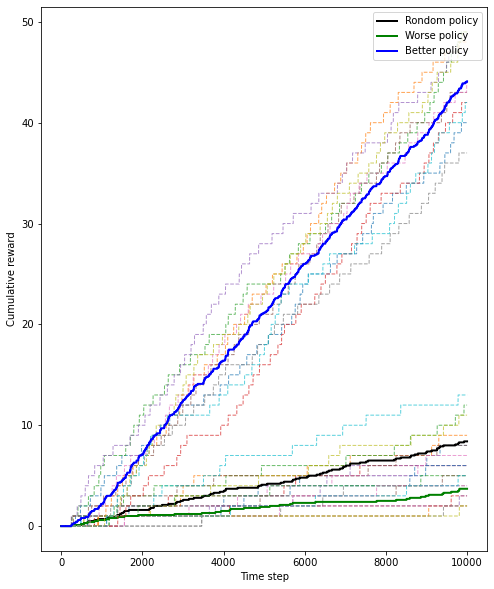

In [9]:
plot_func(rewards_list_0, rewards_list_1, rewards_list_2)